In [1]:
# Install necessary packages
install.packages("tidyverse")
install.packages("ggplot2")
install.packages('ape')
install.packages("phylolm")
install.packages("viridis")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’




In [2]:
if (!requireNamespace("BiocManager", quietly = TRUE)) #Install bioconductor, repository of bioinformatics packages in R
    install.packages("BiocManager")

BiocManager::install("edgeR"); #Install the EdgeR package
BiocManager::install("ggtree")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'BiocVersion', 'edgeR'

also installing the dependencies ‘statmod’, ‘limma’, ‘locfit’


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'ggtree'

also installing the dependencies ‘gridGraphics’, ‘ggplotify’, ‘patchwork’, ‘lazyeval’, ‘aplot’, ‘ggfun’, ‘yulab.utils’, ‘tidytree’, ‘treeio’




In [3]:
# Install necessary libraries
library(tidyverse)
library(dplyr)
library(edgeR)
library(ggplot2)
library(readr)
library(phylolm)
library(ape)
library(ggtree)
library(tibble)
library(RColorBrewer)
library(viridis)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: limma

Loading required package: ape


Attaching package: ‘ape’


The following object is masked from ‘package:dplyr’:

    where


ggtree v3.14.0 Learn more at https://yulab-smu.top/contribution-tree-data/

Please cite:

Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods
for mapping and visualizing associated data on phylogeny using ggtree.
Molecular Biology and Evolution. 2018, 35(12):3041-3043.
doi:10.1093/molbev/msy194


At

  [1] "Trichechus_manatus"           "Loxodonta_africana"          
  [3] "Heterohyrax_brucei"           "Procavia_capensis"           
  [5] "Chrysochloris_asiatica"       "Microgale_talazaci"          
  [7] "Echinops_telfairi"            "Elephantulus_edwardii"       
  [9] "Orycteropus_afer"             "Dasypus_novemcinctus"        
 [11] "Chaetophractus_vellerosus"    "Tolypeutes_matacus"          
 [13] "Choloepus_hoffmanni"          "Choloepus_didactylus"        
 [15] "Tamandua_tetradactyla"        "Myrmecophaga_tridactyla"     
 [17] "Ochotona_princeps"            "Lepus_americanus"            
 [19] "Oryctolagus_cuniculus"        "Castor_canadensis"           
 [21] "Perognathus_longimembris"     "Dipodomys_stephensi"         
 [23] "Dipodomys_ordii"              "Zapus_hudsonius"             
 [25] "Allactaga_bullata"            "Jaculus_jaculus"             
 [27] "Nannospalax_galili"           "Cricetomys_gambianus"        
 [29] "Rattus_norvegicus"            "Mus_pahari

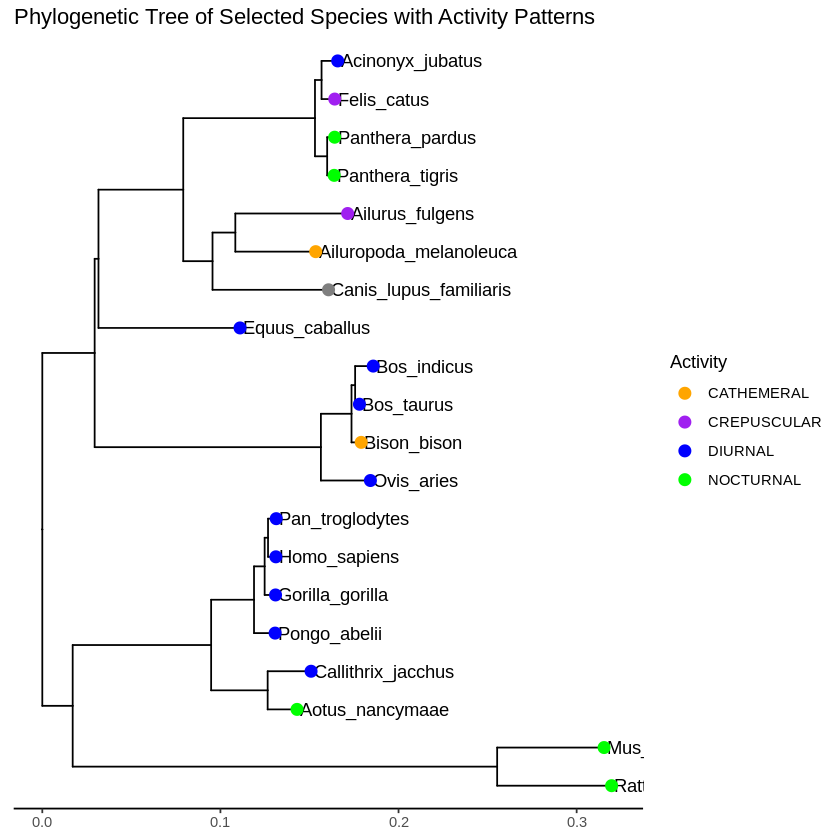

In [4]:
# Visualization
# Load the species data with updated activity patterns from the provided CSV

species_data <- data.frame(
  Species = c("Acinonyx_jubatus", "Ailuropoda_melanoleuca", "Ailurus_fulgens",
              "Aotus_nancymaae", "Bison_bison", "Bos_indicus", "Bos_taurus",
              "Callithrix_jacchus", "Canis_lupus_familiaris", "Gorilla_gorilla",
              "Homo_sapiens", "Felis_catus", "Mus_musculus", "Pan_troglodytes",
              "Panthera_pardus", "Panthera_tigris", "Equus_caballus",
              "Rattus_norvegicus", "Pongo_abelii", "Ovis_aries"),
  Activity = c("DIURNAL", "CATHEMERAL", "CREPUSCULAR", "NOCTURNAL", "CATHEMERAL",
               "DIURNAL", "DIURNAL", "DIURNAL", "VARIES", "DIURNAL",
               "DIURNAL", "CREPUSCULAR", "NOCTURNAL", "DIURNAL", "NOCTURNAL",
               "NOCTURNAL", "DIURNAL", "NOCTURNAL", "DIURNAL", "DIURNAL")
)

# Load the phylogenetic tree (ensure you have the correct tree file)
tree <- read.tree("sample_data/Zoonomia_ChrX_lessGC40_241species_30Consensus.tree")

# Check tree species labels for compatibility with species_data
tree_species <- tree$tip.label
print(tree_species)

# Step 1: Make sure species names in species_data are formatted with underscores
species_data$Species <- gsub(" ", "_", species_data$Species)

# Step 2: Select species that are present in both the tree and species_data
selected_species <- intersect(tree$tip.label, species_data$Species)

# Step 3: Prune the tree to only include species present in both lists
pruned_tree <- drop.tip(tree, setdiff(tree$tip.label, selected_species))

# Step 4: Filter species_data to only include selected species
species_data_selected <- species_data %>% filter(Species %in% selected_species)

# Step 5: Plot the pruned tree with ggtree
p <- ggtree(pruned_tree) + geom_tiplab()

# Step 6: Add the trait annotation (Activity) as point colors
p <- p %<+% species_data_selected +
  geom_tippoint(aes(color = Activity), size = 3) +
  scale_color_manual(values = c("DIURNAL" = "blue", "NOCTURNAL" = "green",
                                "CATHEMERAL" = "orange", "CREPUSCULAR" = "purple")) +
  theme_tree2() +
  ggtitle("Phylogenetic Tree of Selected Species with Activity Patterns")

# Step 7: Print the tree
print(p)

# Save the tree as an image
ggsave("phylogenetic_tree_with_activity_patterns.png", plot = p, width = 10, height = 8, dpi = 300)

In [5]:
############################################################################################################

Rows: 205151 Columns: 242
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (1): X1
dbl (241): X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 117914 Columns: 242
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr   (1): X1
dbl (241): X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Astrocyte Sample Matrix (5 × 20):
                              Acinonyx_jubatus Ailuropoda_melanoleuca
hg38:chr5:156838942-156839443         0.453687               0.219712
hg38:chr20:36866922-36867423          0.110685               0.550990
hg38:chr20:23357986-23358487         -1.000000              -1.000000
hg38:chr3:127888609-127889110         0.339005               0.259972
hg38:chr5:142065223-142065724         0.202014               0.568476
                              Ailurus_fulgens Aotus_nancymaae Bison_bison
hg38:chr5:156838942-156839443        0.849101       0.1978780    0.159216
hg38:chr20:36866922-36867423         0.761848       0.8683150   -1.000000
hg38:chr20:23357986-23358487        -1.000000       0.7966860   -1.000000
hg38:chr3:127888609-127889110        0.381893       0.8387940    0.133690
hg38:chr5:142065223-142065724        0.817948       0.0638881    0.777369
                              Bos_indicus Bos_taurus Callithrix_jacchus
hg38:chr5:156838942-156839443 

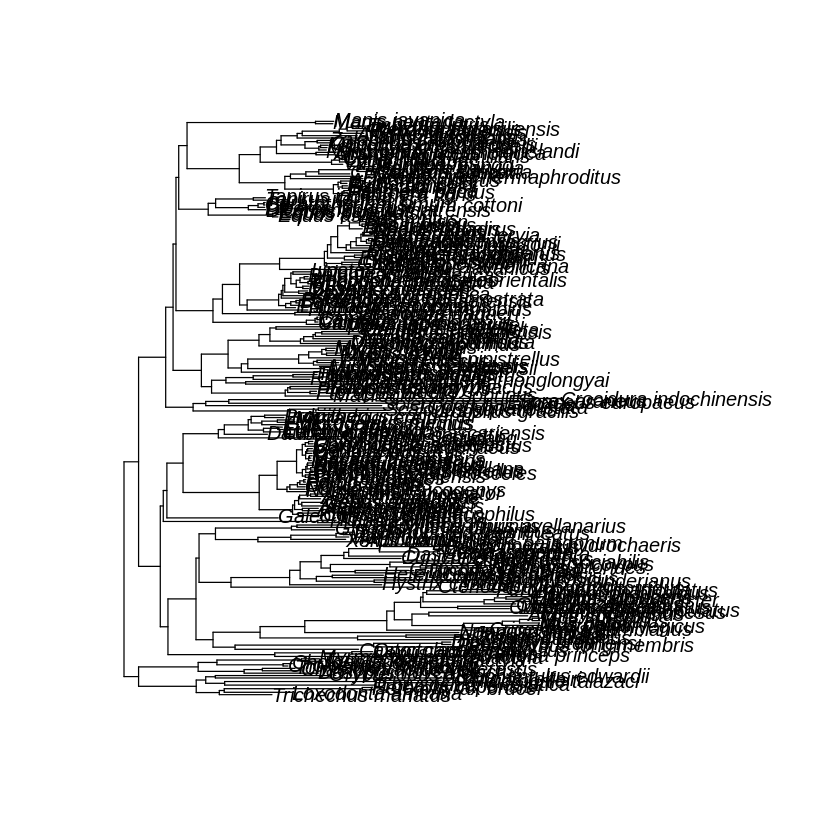

In [6]:
# Set seed for reproducibility
set.seed(123)

# Load the phylogenetic tree
tree_file <- "sample_data/Zoonomia_ChrX_lessGC40_241species_30Consensus.tree"
phy_tree <- read.tree(file = tree_file)
plot(phy_tree, type = "phylogram", show.tip.label = TRUE)

# Load the Astrocyte and Microglia prediction matrices
astro_data <- read_tsv("sample_data/Astro/240_predictions_MatrixStacked.tsv", col_names = FALSE)
micro_data <- read_tsv("sample_data/Micro/240_predictions_MatrixStacked.tsv", col_names = FALSE)

# Load species names
astro_names <- readLines("sample_data/Astro/240_predictions_NamesList.txt")
micro_names <- readLines("sample_data/Micro/240_predictions_NamesList.txt")

# Set column names for the data
colnames(astro_data) <- c("chr", astro_names)
colnames(micro_data) <- c("chr", micro_names)

# List of species of interest
species_of_interest <- c("Acinonyx_jubatus", "Ailuropoda_melanoleuca", "Ailurus_fulgens",
                         "Aotus_nancymaae", "Bison_bison", "Bos_indicus", "Bos_taurus",
                         "Callithrix_jacchus", "Canis_lupus_familiaris", "Gorilla_gorilla",
                         "Homo_sapiens", "Felis_catus", "Mus_musculus", "Pan_troglodytes",
                         "Panthera_pardus", "Panthera_tigris", "Equus_caballus",
                         "Rattus_norvegicus", "Pongo_abelii", "Ovis_aries")

# Filter to only keep the columns for the species of interest
astro_indices <- which(colnames(astro_data) %in% species_of_interest)
micro_indices <- which(colnames(micro_data) %in% species_of_interest)

# Include the 'chr' column and the filtered species columns
astro_data_filtered <- astro_data %>%
  select(1, all_of(astro_indices))

micro_data_filtered <- micro_data %>%
  select(1, all_of(micro_indices))

# Filter to only rows with hg38 chromosomes
astro_data_hg38 <- astro_data_filtered %>%
  filter(grepl("^hg38", chr))

micro_data_hg38 <- micro_data_filtered %>%
  filter(grepl("^hg38", chr))

# Randomly sample up to 10,000 rows or all available rows if fewer
astro_sample_matrix <- astro_data_hg38 %>%
  sample_n(min(10000, nrow(.)), replace = FALSE)

micro_sample_matrix <- micro_data_hg38 %>%
  sample_n(min(10000, nrow(.)), replace = FALSE)

# Ensure unique row names by appending a suffix to duplicates
make_unique_chr <- function(data) {
  data$chr <- make.unique(as.character(data$chr))
  return(data)
}

astro_sample_matrix <- make_unique_chr(astro_sample_matrix)
micro_sample_matrix <- make_unique_chr(micro_sample_matrix)

# Convert data to wide format
astro_sample_matrix_wide <- astro_sample_matrix %>% column_to_rownames("chr")
micro_sample_matrix_wide <- micro_sample_matrix %>% column_to_rownames("chr")

# Display the first 3 rows and 5 columns for both matrices
cat("Astrocyte Sample Matrix (5 × 20):\n")
print(astro_sample_matrix_wide[1:5, 1:min(20, ncol(astro_sample_matrix_wide))])

cat("\nMicroglia Sample Matrix (5 × 20):\n")
print(micro_sample_matrix_wide[1:5, 1:min(20, ncol(micro_sample_matrix_wide))])

# Display dimensions
cat("\nDimensions of Astrocyte Matrix:", dim(astro_sample_matrix_wide), "\n")
cat("Dimensions of Microglia Matrix:", dim(micro_sample_matrix_wide), "\n")

# Save the sampled data
write.table(astro_sample_matrix_wide, "astro_sample_matrix_filtered.tsv", sep = "\t", quote = FALSE, row.names = TRUE, col.names = NA)
write.table(micro_sample_matrix_wide, "micro_sample_matrix_filtered.tsv", sep = "\t", quote = FALSE, row.names = TRUE, col.names = NA)

In [7]:
# Function to parse chr, start, and stop from the 'chr' column
generate_peak_info <- function(data) {
  data %>%
    mutate(
      start = as.numeric(sub(".*:(\\d+)-\\d+.*", "\\1", chr)),
      stop = as.numeric(sub(".*:\\d+-(\\d+).*", "\\1", chr)),
      id = rownames(data)
    ) %>%
    select(chr, start, stop, id) %>%
    column_to_rownames("id")
}

# Generate peak information for astro and micro data
astro_peak_info <- generate_peak_info(astro_sample_matrix)
micro_peak_info <- generate_peak_info(micro_sample_matrix)

# Display the first 5 rows and the dimensions for both
cat("Astrocyte Peak Information (First 5 rows):\n")
print(astro_peak_info[1:5, ])
cat("\nDimensions of Astrocyte Peak Information:", dim(astro_peak_info), "\n")

cat("\nMicroglia Peak Information (First 5 rows):\n")
print(micro_peak_info[1:5, ])
cat("\nDimensions of Microglia Peak Information:", dim(micro_peak_info), "\n")

Astrocyte Peak Information (First 5 rows):
                            chr     start      stop
1 hg38:chr5:156838942-156839443 156838942 156839443
2  hg38:chr20:36866922-36867423  36866922  36867423
3  hg38:chr20:23357986-23358487  23357986  23358487
4 hg38:chr3:127888609-127889110 127888609 127889110
5 hg38:chr5:142065223-142065724 142065223 142065724

Dimensions of Astrocyte Peak Information: 10000 3 

Microglia Peak Information (First 5 rows):
                             chr     start      stop
1   hg38:chr13:40666458-40666959  40666458  40666959
2   hg38:chr10:75099839-75100340  75099839  75100340
3 hg38:chr12:100200509-100201010 100200509 100201010
4     hg38:chr17:7483132-7483633   7483132   7483633
5  hg38:chr7:130913211-130913712 130913211 130913712

Dimensions of Microglia Peak Information: 10000 3 


In [8]:
# Load species information from a local CSV file
species_file_path <- "sample_data/ZoonomiaGenomeInfo_3.csv"  # Replace with your actual file path
species_info <- read.csv(file = species_file_path, stringsAsFactors = FALSE, header = TRUE)

# Set row names to the 'Species' column
rownames(species_info) <- species_info$Species

# Use the column names of astro_sample_matrix_wide (or micro_sample_matrix_wide)
specOrderV <- colnames(astro_sample_matrix_wide)

# Print specOrderV to verify
cat("Species Order Vector (specOrderV):\n")
print(specOrderV)

# Reorder the species information to match the prediction matrix order
species_info_reordered <- species_info[specOrderV, , drop = FALSE]

# Display the reordered species information for verification
cat("\nReordered Species Information (First 5 rows):\n")
print(species_info_reordered[1:10, ])

Species Order Vector (specOrderV):
 [1] "Acinonyx_jubatus"       "Ailuropoda_melanoleuca" "Ailurus_fulgens"       
 [4] "Aotus_nancymaae"        "Bison_bison"            "Bos_indicus"           
 [7] "Bos_taurus"             "Callithrix_jacchus"     "Canis_lupus_familiaris"
[10] "Equus_caballus"         "Felis_catus"            "Gorilla_gorilla"       
[13] "Homo_sapiens"           "Mus_musculus"           "Ovis_aries"            
[16] "Pan_troglodytes"        "Panthera_pardus"        "Panthera_tigris"       
[19] "Pongo_abelii"           "Rattus_norvegicus"     

Reordered Species Information (First 5 rows):
                       ZoonomiaIndex                Species
Acinonyx_jubatus                   1       Acinonyx_jubatus
Ailuropoda_melanoleuca             2 Ailuropoda_melanoleuca
Ailurus_fulgens                    3        Ailurus_fulgens
Aotus_nancymaae                    5        Aotus_nancymaae
Bison_bison                        8            Bison_bison
Bos_indicus            

In [9]:
# Load the molecular similarity matrix from a local CSV file
molecular_sim_file_path <- "sample_data/200Mammal_hal_tree_noancestors_matrix.csv"  # Replace with your actual file path
molecularSimM <- as.matrix(read.csv(file = molecular_sim_file_path, stringsAsFactors = FALSE, header = TRUE, row.names = 1))

# Create the molecular distance matrix from the similarity matrix
molecularDistM <- molecularSimM  # Copy the similarity matrix to initialize the distance matrix

# Fill in missing values and set diagonal elements to 0sample_data
for (curSpec1 in rownames(molecularDistM)) {
  for (curSpec2 in colnames(molecularDistM)) {
    if (curSpec1 != curSpec2) {
      if (is.na(molecularDistM[curSpec1, curSpec2])) {
        molecularDistM[curSpec1, curSpec2] <- molecularDistM[curSpec2, curSpec1]  # Fill missing values symmetrically
      }
    } else {
      molecularDistM[curSpec1, curSpec2] <- 0  # Set the diagonal to 0
    }
  }
}

# Reorder the molecular distance matrix to match the species order in specOrderV
molecularDistM <- molecularDistM[specOrderV, specOrderV]

# Display the first 5 rows and columns of the molecular distance matrix for verification
cat("Molecular Distance Matrix (First 5 × 5):\n")
print(molecularDistM[1:5, 1:5])

# Display the dimensions of the molecular distance matrix
cat("\nDimensions of Molecular Distance Matrix:", dim(molecularDistM), "\n")


Molecular Distance Matrix (First 5 × 5):
                       Acinonyx_jubatus Ailuropoda_melanoleuca Ailurus_fulgens
Acinonyx_jubatus                0.00000                0.16105         0.13301
Ailuropoda_melanoleuca          0.16105                0.00000         0.13488
Ailurus_fulgens                 0.13301                0.13488         0.00000
Aotus_nancymaae                 0.57494                0.61681         0.58877
Bison_bison                     0.40285                0.44472         0.41668
                       Aotus_nancymaae Bison_bison
Acinonyx_jubatus               0.57494     0.40285
Ailuropoda_melanoleuca         0.61681     0.44472
Ailurus_fulgens                0.58877     0.41668
Aotus_nancymaae                0.00000     0.58947
Bison_bison                    0.58947     0.00000

Dimensions of Molecular Distance Matrix: 20 20 


In [10]:
####################PHYLOLM#######################################

In [11]:
# Function to prepare and save the transposed data frame
save_transposed_data <- function(data_matrix, output_filename) {
  # Transpose the data matrix so that species are rows and peaks are columns
  transposed_data <- t(data_matrix)

  # Convert the transposed matrix to a data frame
  transposed_data_df <- as.data.frame(transposed_data, stringsAsFactors = FALSE)

  # Add a 'Species' column based on row names
  transposed_data_df$Species <- rownames(transposed_data_df)

  # Move 'Species' column to the first position
  transposed_data_df <- transposed_data_df[, c(ncol(transposed_data_df), 1:(ncol(transposed_data_df) - 1))]

  # Save the transposed data frame to a CSV file
  write.csv(transposed_data_df, file = output_filename, row.names = FALSE)

  # Print a message and the first few rows of the transposed data frame
  cat("Transposed data has been saved to", output_filename, "\n")
  print(head(transposed_data_df))
}

# Example usage for astrocyte and microglia data
save_transposed_data(astro_sample_matrix_wide, "transposed_astro_data.csv")
save_transposed_data(micro_sample_matrix_wide, "transposed_micro_data.csv")


Streaming output truncated to the last 5000 lines.
Bison_bison                               0.495911                   -1.000000
Bos_indicus                               0.667176                    0.495422
                       hg38:chr22:50628023-50628524
Acinonyx_jubatus                          -1.000000
Ailuropoda_melanoleuca                    -1.000000
Ailurus_fulgens                           -1.000000
Aotus_nancymaae                            0.450475
Bison_bison                               -1.000000
Bos_indicus                               -1.000000
                       hg38:chr4:177442732-177443233
Acinonyx_jubatus                           -1.000000
Ailuropoda_melanoleuca                     -1.000000
Ailurus_fulgens                            -1.000000
Aotus_nancymaae                             0.550278
Bison_bison                                -1.000000
Bos_indicus                                -1.000000
                       hg38:chr17:68512128-68512629
Acin

In [12]:
# Function to filter columns with -1 values and save to a new CSV file
filter_negative_values <- function(input_filename, output_filename) {
  # Read the transposed CSV file
  data <- read.csv(input_filename, stringsAsFactors = FALSE)

  # Store 'Species' column separately to prevent numeric conversion
  species_col <- data$Species

  # Convert the rest of the data to numeric, ignoring 'Species'
  data[, -1] <- lapply(data[, -1], function(x) as.numeric(as.character(x)))

  # Add 'Species' column back to the data frame
  data$Species <- species_col

  # Identify columns (excluding 'Species') that do not contain any -1 values
  valid_columns <- which(!apply(data[, -1], 2, function(col) any(col == -1, na.rm = TRUE)))

  # Check if there are valid columns left after filtering
  if (length(valid_columns) == 0) {
    warning("No columns remain after filtering out those with -1 values. Saving only the 'Species' column.")
    filtered_data <- data.frame(Species = data$Species)
  } else {
    # Include 'Species' column and valid columns only
    filtered_data <- data[, c(1, valid_columns + 1)]  # `1` is for the 'Species' column
  }

  # Save the filtered data frame to a CSV file
  write.csv(filtered_data, file = output_filename, row.names = FALSE)

  # Print a message and the first few rows of the filtered data frame
  cat("Filtered data has been saved to", output_filename, "\n")
  print(head(filtered_data))
}

# Example usage for the astrocyte and microglia data
filter_negative_values("transposed_astro_data.csv", "filtered_astro_data.csv")
filter_negative_values("transposed_micro_data.csv", "filtered_micro_data.csv")


Streaming output truncated to the last 5000 lines.
6                     0.609520                   0.1920090
  hg38.chr8.8324030.8324531 hg38.chr6.43687559.43688060
1                  0.592669                    0.704734
2                  0.727455                    0.449756
3                  0.958737                    0.643872
4                  0.350806                    0.505721
5                  0.489407                    0.466536
6                  0.864921                    0.213369
  hg38.chr19.15223282.15223783 hg38.chr17.40072025.40072526
1                     0.922011                    0.3152750
2                     0.869754                    0.1882730
3                     0.182578                    0.8230140
4                     0.656549                    0.0458673
5                     0.430318                    0.7828210
6                     0.919552                    0.6883060
  hg38.chr6.21594005.21594506 hg38.chr5.154143146.154143647
1                 

In [13]:
# Create a new df with numeric values as phylolm doesn't take categorical data as input
species_data <- data.frame(
  Species = c("Acinonyx_jubatus", "Ailuropoda_melanoleuca", "Ailurus_fulgens",
              "Aotus_nancymaae", "Bison_bison", "Bos_indicus", "Bos_taurus",
              "Callithrix_jacchus", "Canis_lupus_familiaris", "Gorilla_gorilla",
              "Homo_sapiens", "Felis_catus", "Mus_musculus", "Pan_troglodytes",
              "Panthera_pardus", "Panthera_tigris", "Equus_caballus",
              "Rattus_norvegicus", "Pongo_abelii", "Ovis_aries"),
  Activity = c("DIURNAL", "CATHEMERAL", "CREPUSCULAR", "NOCTURNAL", "CATHEMERAL",
               "DIURNAL", "DIURNAL", "DIURNAL", "VARIES", "DIURNAL",
               "DIURNAL", "CREPUSCULAR", "NOCTURNAL", "DIURNAL", "NOCTURNAL",
               "NOCTURNAL", "DIURNAL", "NOCTURNAL", "DIURNAL", "DIURNAL"),
  Body_Temperature = c(38.75, 37.5, 37.5, 36, 37.75, 38, 38, 37, 38.25, 37,
                       37, 38, 37, 37, 38.5, 38.5, 38, 37, 37, 38.5)
)

# Assign circadian activity index based on activity description
species_data$Circadian_Activity_Index <- sapply(species_data$Activity, function(x) {
  if (x == "DIURNAL") {
    return(100)
  } else if (x == "NOCTURNAL") {
    return(0)
  } else if (x == "CREPUSCULAR") {
    return(50)
  } else if (x == "CATHEMERAL") {
    return(50)
  } else if (x == "VARIES") {
    return(75)  # Arbitrary value for mixed patterns
  } else {
    return(NA)
  }
})

# View the new data frame
print(species_data)

                  Species    Activity Body_Temperature Circadian_Activity_Index
1        Acinonyx_jubatus     DIURNAL            38.75                      100
2  Ailuropoda_melanoleuca  CATHEMERAL            37.50                       50
3         Ailurus_fulgens CREPUSCULAR            37.50                       50
4         Aotus_nancymaae   NOCTURNAL            36.00                        0
5             Bison_bison  CATHEMERAL            37.75                       50
6             Bos_indicus     DIURNAL            38.00                      100
7              Bos_taurus     DIURNAL            38.00                      100
8      Callithrix_jacchus     DIURNAL            37.00                      100
9  Canis_lupus_familiaris      VARIES            38.25                       75
10        Gorilla_gorilla     DIURNAL            37.00                      100
11           Homo_sapiens     DIURNAL            37.00                      100
12            Felis_catus CREPUSCULAR   

In [14]:
################################## Cell_Type - Astrocyte #############################################

In [15]:
# Cell type - Astro
# Load the peak data
data <- read.csv("filtered_astro_data.csv", row.names = 1)

# Load the phylogenetic tree (update the path)
tree <- read.tree("sample_data/Zoonomia_ChrX_lessGC40_241species_30Consensus.tree")

# Ensure the tree matches the species in the data
common_species <- intersect(tree$tip.label, rownames(data))
tree <- drop.tip(tree, setdiff(tree$tip.label, common_species))
data <- data[common_species, ]

# Create species trait data (update your species data if needed)
species_data <- data.frame(
  Species = c("Acinonyx_jubatus", "Ailuropoda_melanoleuca", "Ailurus_fulgens",
              "Aotus_nancymaae", "Bison_bison", "Bos_indicus", "Bos_taurus",
              "Callithrix_jacchus", "Canis_lupus_familiaris", "Gorilla_gorilla",
              "Homo_sapiens", "Felis_catus", "Mus_musculus", "Pan_troglodytes",
              "Panthera_pardus", "Panthera_tigris", "Equus_caballus",
              "Rattus_norvegicus", "Pongo_abelii", "Ovis_aries"),
  Activity = c("DIURNAL", "CATHEMERAL", "CREPUSCULAR", "NOCTURNAL", "CATHEMERAL",
               "DIURNAL", "DIURNAL", "DIURNAL", "VARIES", "DIURNAL",
               "DIURNAL", "CREPUSCULAR", "NOCTURNAL", "DIURNAL", "NOCTURNAL",
               "NOCTURNAL", "DIURNAL", "NOCTURNAL", "DIURNAL", "DIURNAL"),
  Body_Temperature = c(38.75, 37.5, 37.5, 36, 37.75, 38, 38, 37, 38.25, 37,
                       37, 38, 37, 37, 38.5, 38.5, 38, 37, 37, 38.5)
)

# Assign circadian activity index
species_data$Circadian_Activity_Index <- sapply(species_data$Activity, function(x) {
  if (x == "DIURNAL") {
    return(100)
  } else if (x == "NOCTURNAL") {
    return(0)
  } else if (x == "CREPUSCULAR") {
    return(50)
  } else if (x == "CATHEMERAL") {
    return(50)
  } else if (x == "VARIES") {
    return(75)  # Arbitrary value for mixed patterns
  } else {
    return(NA)
  }
})

# Filter species_data to match the common species in the tree and data
species_data <- species_data %>% filter(Species %in% common_species)

# Set Species as row names for easier matching
rownames(species_data) <- species_data$Species
species_data <- species_data[common_species, ]

# Add the trait column to the peak data
data$trait <- species_data$Circadian_Activity_Index

# Initialize a data frame to store p-values, correlations, and R-squared values
results <- data.frame(Peak = colnames(data)[-ncol(data)], P_value = NA, Correlation = NA, R_squared = NA)

# Loop over all columns (peaks)
for (peak in colnames(data)[-ncol(data)]) {
  if (all(!is.na(data[[peak]]))) {  # Check for missing values in the peak
    model <- tryCatch(
      phylolm(as.formula(paste("trait ~", peak)), data = data, phy = tree, model = "BM"),
      error = function(e) {
        print(paste("Error with peak:", peak, ":", e$message))
        return(NULL)
      }
    )

    if (!is.null(model)) {
      results$P_value[results$Peak == peak] <- summary(model)$coefficients[2, 4]  # Extract p-value for the coefficient
      results$Correlation[results$Peak == peak] <- summary(model)$coefficients[2, 1]  # Extract correlation/estimate

      # Calculate R-squared value
      ss_total <- sum((data$trait - mean(data$trait))^2)
      ss_residual <- sum((data$trait - predict(model))^2)
      results$R_squared[results$Peak == peak] <- 1 - (ss_residual / ss_total)
    }
  } else {
    print(paste("Skipping peak due to missing data:", peak))
  }
}

# Adjust the correlations using Fisher's transformation for standardization
results$Adjusted_Correlation <- ifelse(!is.na(results$Correlation), atanh(results$Correlation), NA)

# Adjust the p-values for multiple testing using the Benjamini-Hochberg method
results$Adjusted_P_value <- p.adjust(results$P_value, method = "BH")

# Print or save the results
print(results)
write.csv(results, "output_Astro.csv", row.names = FALSE)


Warning message in atanh(results$Correlation):
“NaNs produced”


                               Peak      P_value   Correlation     R_squared
1     hg38.chr5.156838942.156839443 2.980492e-01   27.03560798 -5.206334e-02
2     hg38.chr3.127888609.127889110 3.411132e-01   19.08689115  2.146772e-02
3     hg38.chr1.216749984.216750485 4.067739e-01   24.90118894 -4.543857e-02
4    hg38.chr10.103626104.103626605 8.967643e-02   48.88786365  7.350966e-02
5       hg38.chr4.85147456.85147957 2.220514e-01   42.87254558 -8.489437e-02
6      hg38.chr19.35748226.35748727 7.556036e-01    6.74353169 -3.674127e-02
7     hg38.chr8.127951440.127951941 7.034356e-01  -10.17766365 -1.460422e-02
8         hg38.chr7.5427188.5427689 6.080142e-02   51.76216145  1.642342e-02
9      hg38.chr18.35497718.35498219 5.778159e-01   16.22342785 -3.632991e-02
10      hg38.chr3.69691035.69691536 7.012989e-01   -9.68874855 -3.675972e-02
11     hg38.chr18.34659587.34660088 8.264335e-01    4.25366645 -1.952397e-02
12     hg38.chr12.56119295.56119796 1.757904e-01  -31.32351491  4.252564e-02

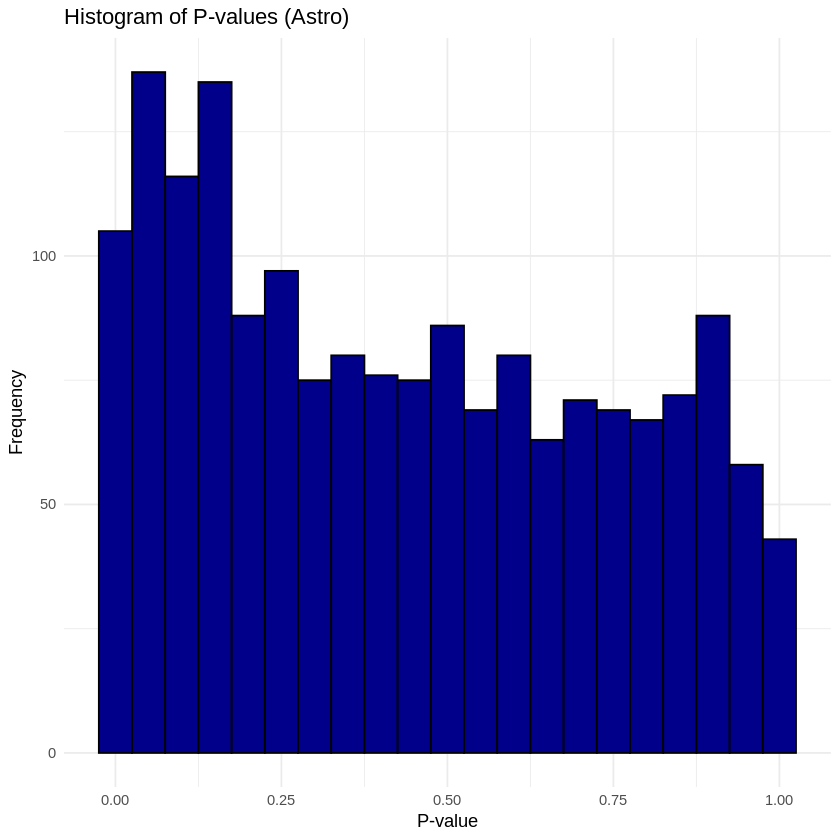

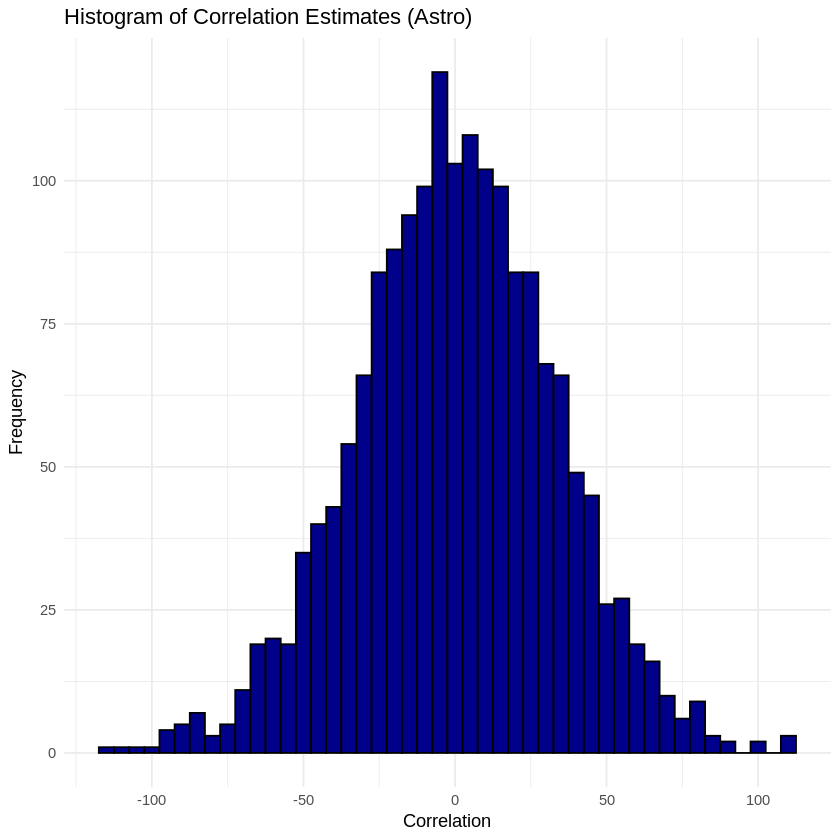

In [16]:
# Cell type - Astro
# Load the results data frame (assuming it was previously saved)
results <- read.csv("output_Astro.csv")

# Plot histogram for p-values
ggplot(results, aes(x = P_value)) +
  geom_histogram(binwidth = 0.05, fill = "darkblue", color = "black") +
  theme_minimal() +
  labs(title = "Histogram of P-values (Astro)", x = "P-value", y = "Frequency")

# Plot histogram for correlation estimates
ggplot(results, aes(x = Correlation)) +
  geom_histogram(binwidth = 5, fill = "darkblue", color = "black") +
  theme_minimal() +
  labs(title = "Histogram of Correlation Estimates (Astro)", x = "Correlation", y = "Frequency")


In [17]:
# Load the necessary library
library(dplyr)

# Load the results data frame (assuming it was previously saved)
results <- read.csv("output_Astro.csv")

# Adjust the p-values using the Benjamini-Hochberg (BH) method for multiple testing correction
results$Adjusted_P_value <- p.adjust(results$P_value, method = "BH")

# Identify significant regions with an adjusted p-value <= 0.1
significant_positive <- results %>% filter(Adjusted_P_value <= 0.1 & Correlation > 0)
significant_negative <- results %>% filter(Adjusted_P_value <= 0.1 & Correlation < 0)

# Count the number of significant regions
num_significant_positive <- nrow(significant_positive)
num_significant_negative <- nrow(significant_negative)

# Print the counts
cat("Number of significantly positively associated regions (Adjusted P <= 0.1):", num_significant_positive, "\n")
cat("Number of significantly negatively associated regions (Adjusted P <= 0.1):", num_significant_negative, "\n")

# Optionally, view the significant regions
print(significant_positive)
print(significant_negative)


Number of significantly positively associated regions (Adjusted P <= 0.1): 2 
Number of significantly negatively associated regions (Adjusted P <= 0.1): 3 
                           Peak      P_value Correlation R_squared
1  hg38.chr22.36659713.36660214 2.852601e-04    86.03824 0.4817546
2 hg38.chr4.148981308.148981809 6.122257e-05    78.87430 0.3484545
  Adjusted_Correlation Adjusted_P_value
1                   NA       0.09984104
2                   NA       0.06304057
                           Peak      P_value Correlation   R_squared
1 hg38.chr1.101288342.101288843 9.905006e-05   -86.11282  0.10114259
2    hg38.chr12.1605170.1605671 1.914337e-04  -108.91222 -0.04956943
3 hg38.chr4.165421727.165422228 1.080695e-04   -92.40684  0.32736305
  Adjusted_Correlation Adjusted_P_value
1                   NA       0.06304057
2                   NA       0.08375225
3                   NA       0.06304057


In [18]:
# Load the data frame (assuming it is named 'results')
# Replace 'your_data_file.csv' with your actual CSV file if needed
results <- read.csv("output_Astro.csv")

# Ensure that 'P_value' column is numeric for sorting
results$P_value <- as.numeric(results$P_value)

# Find the most positively associated peak (smallest p-value)
most_positive_peak <- results %>%
  filter(!is.na(P_value)) %>%
  arrange(P_value) %>%
  slice(1)

# Find the most negatively associated peak (largest p-value)
most_negative_peak <- results %>%
  filter(!is.na(P_value)) %>%
  arrange(desc(P_value)) %>%
  slice(1)

# Print the most positively and negatively associated peaks
cat("Most Positively Associated Peak:", most_positive_peak$Peak,
    "with P-value:", most_positive_peak$P_value, "\n")

cat("Most Negatively Associated Peak:", most_negative_peak$Peak,
    "with P-value:", most_negative_peak$P_value, "\n")


Most Positively Associated Peak: hg38.chr4.148981308.148981809 with P-value: 6.122257e-05 
Most Negatively Associated Peak: hg38.chr1.15928890.15929391 with P-value: 0.9989644 


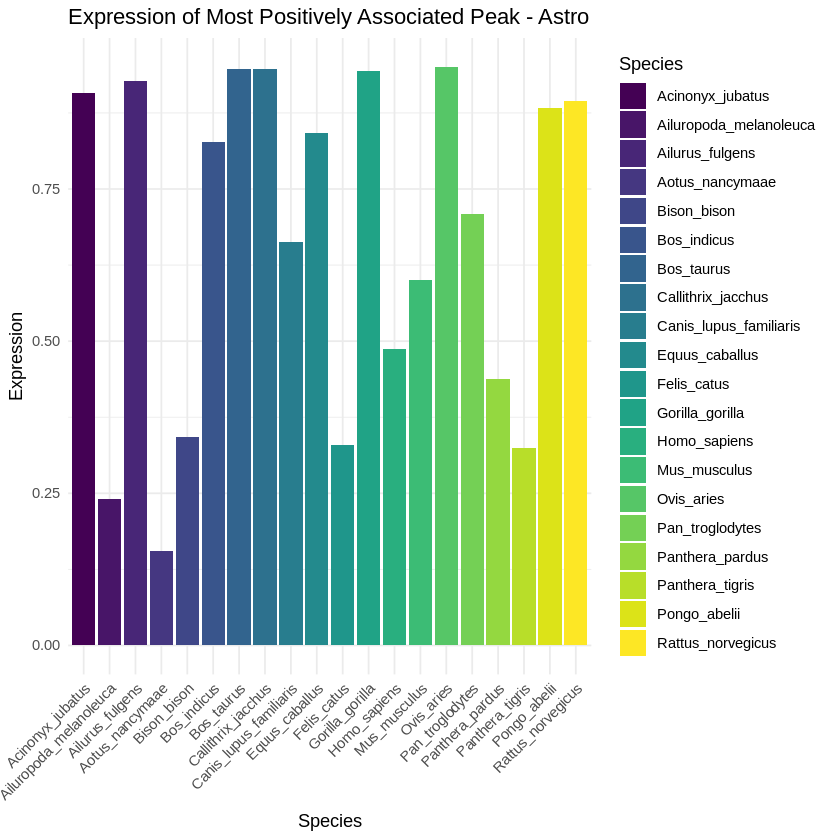

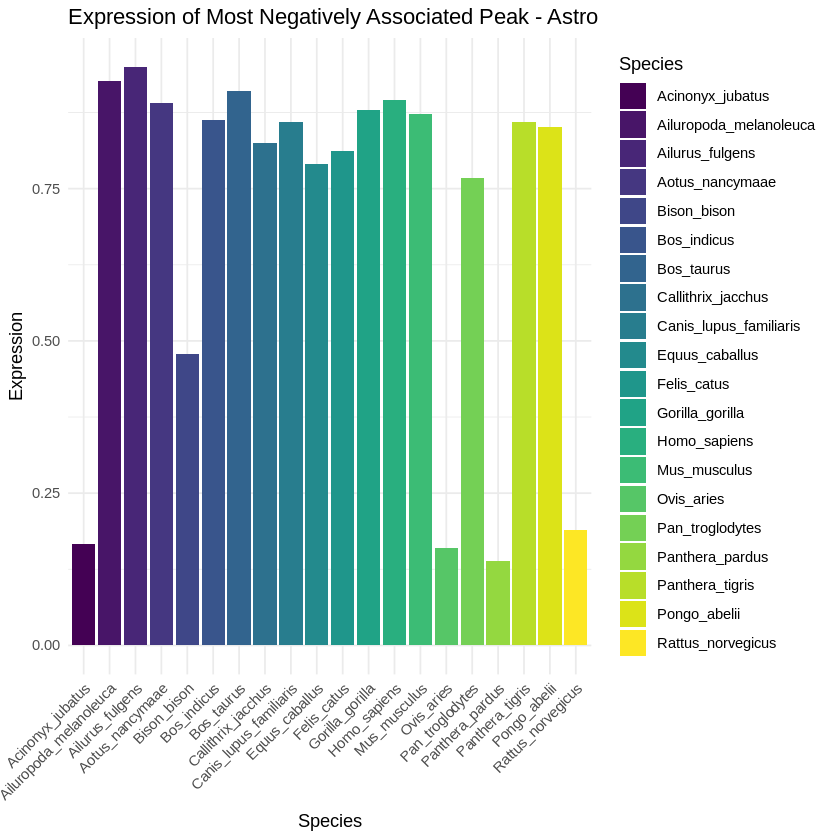

In [19]:
# Generate 20 distinct colors using a custom color palette or viridis
colors_20 <- viridis::viridis(20)

# Load the filtered data
filtered_data <- read.csv("filtered_astro_data.csv")

# Extract the most positively and negatively associated peaks from the results data frame
most_positive_peak <- "hg38.chr4.148981308.148981809"  # Replace with the actual identifier if needed
most_negative_peak <- "hg38.chr1.15928890.15929391"   # Replace with the actual identifier if needed

# Extract relevant data for these peaks
positive_peak_data <- filtered_data %>%
  select(Species, all_of(most_positive_peak))

negative_peak_data <- filtered_data %>%
  select(Species, all_of(most_negative_peak))

# Melt data for plotting
positive_peak_data_long <- positive_peak_data %>%
  pivot_longer(cols = -Species, names_to = "Peak", values_to = "Expression")

negative_peak_data_long <- negative_peak_data %>%
  pivot_longer(cols = -Species, names_to = "Peak", values_to = "Expression")

# Plot for the most positively associated peak with 20 custom colors
ggplot(positive_peak_data_long, aes(x = Species, y = Expression, fill = Species)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = colors_20) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Expression of Most Positively Associated Peak - Astro",
       x = "Species",
       y = "Expression")

# Plot for the most negatively associated peak with 20 custom colors
ggplot(negative_peak_data_long, aes(x = Species, y = Expression, fill = Species)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = colors_20) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Expression of Most Negatively Associated Peak - Astro",
       x = "Species",
       y = "Expression")


In [20]:
# Load the results data frame
results <- read.csv("output_Astro.csv")

# Check if the required columns exist
required_columns <- c("Peak", "P_value")
missing_columns <- setdiff(required_columns, colnames(results))

if (length(missing_columns) > 0) {
  stop(paste("The following required columns are missing from the data frame:", paste(missing_columns, collapse = ", ")))
}

# Step 1: Find the top 200 positively and negatively associated peaks based on p-value
top_200_positive_peaks <- results %>%
  filter(!is.na(P_value)) %>%
  arrange(P_value) %>%
  slice(1:200)

top_200_negative_peaks <- results %>%
  filter(!is.na(P_value)) %>%
  arrange(desc(P_value)) %>%
  slice(1:200)

# Step 2: Correctly split the 'Peak' column into 'chr', 'start', and 'stop'
top_200_positive_peaks <- top_200_positive_peaks %>%
  separate(Peak, into = c("genome", "chr", "start", "stop"), sep = "\\.", remove = FALSE) %>%
  select(chr, start, stop)

top_200_negative_peaks <- top_200_negative_peaks %>%
  separate(Peak, into = c("genome", "chr", "start", "stop"), sep = "\\.", remove = FALSE) %>%
  select(chr, start, stop)

# Remove 'hg38.' prefix from 'chr' column
top_200_positive_peaks <- top_200_positive_peaks %>%
  mutate(chr = sub("hg38\\.", "", chr))

top_200_negative_peaks <- top_200_negative_peaks %>%
  mutate(chr = sub("hg38\\.", "", chr))

# Step 3: Save the results to .bed files
write.table(top_200_positive_peaks,
            "top_200_positive_astro.bed",
            sep = "\t",
            row.names = FALSE,
            col.names = FALSE,
            quote = FALSE)

write.table(top_200_negative_peaks,
            "top_200_negative_astro.bed",
            sep = "\t",
            row.names = FALSE,
            col.names = FALSE,
            quote = FALSE)

cat("Top 200 positively and negatively associated peaks have been saved as .bed files.")


Top 200 positively and negatively associated peaks have been saved as .bed files.

In [21]:
# Load the results data frame
results <- read.csv("output_Astro.csv")

# Check if the required columns exist
if (!"Peak" %in% colnames(results)) {
  stop("The 'Peak' column is missing from the data frame.")
}

# Step 1: Split the 'Peak' column into 'chr', 'start', and 'stop'
results_bed <- results %>%
  separate(Peak, into = c("genome", "chr", "start", "stop"), sep = "\\.", remove = FALSE) %>%
  select(chr, start, stop)

# Remove 'hg38.' prefix from 'chr' column
results_bed <- results_bed %>%
  mutate(chr = sub("hg38\\.", "", chr))

# Step 2: Save the results to a .bed file
write.table(results_bed,
            "all_peaks_astro.bed",
            sep = "\t",
            row.names = FALSE,
            col.names = FALSE,
            quote = FALSE)

cat("All peaks have been saved as a .bed file.")


All peaks have been saved as a .bed file.

In [25]:
##################################Cell_Type - Microglia#############################################

In [26]:
# Cell type - Micro
# Load the peak data
data <- read.csv("filtered_micro_data.csv", row.names = 1)

# Load the phylogenetic tree (update the path)
tree <- read.tree("sample_data/Zoonomia_ChrX_lessGC40_241species_30Consensus.tree")

# Ensure the tree matches the species in the data
common_species <- intersect(tree$tip.label, rownames(data))
tree <- drop.tip(tree, setdiff(tree$tip.label, common_species))
data <- data[common_species, ]

# Create species trait data (update your species data if needed)
species_data <- data.frame(
  Species = c("Acinonyx_jubatus", "Ailuropoda_melanoleuca", "Ailurus_fulgens",
              "Aotus_nancymaae", "Bison_bison", "Bos_indicus", "Bos_taurus",
              "Callithrix_jacchus", "Canis_lupus_familiaris", "Gorilla_gorilla",
              "Homo_sapiens", "Felis_catus", "Mus_musculus", "Pan_troglodytes",
              "Panthera_pardus", "Panthera_tigris", "Equus_caballus",
              "Rattus_norvegicus", "Pongo_abelii", "Ovis_aries"),
  Activity = c("DIURNAL", "CATHEMERAL", "CREPUSCULAR", "NOCTURNAL", "CATHEMERAL",
               "DIURNAL", "DIURNAL", "DIURNAL", "VARIES", "DIURNAL",
               "DIURNAL", "CREPUSCULAR", "NOCTURNAL", "DIURNAL", "NOCTURNAL",
               "NOCTURNAL", "DIURNAL", "NOCTURNAL", "DIURNAL", "DIURNAL"),
  Body_Temperature = c(38.75, 37.5, 37.5, 36, 37.75, 38, 38, 37, 38.25, 37,
                       37, 38, 37, 37, 38.5, 38.5, 38, 37, 37, 38.5)
)

# Assign circadian activity index
species_data$Circadian_Activity_Index <- sapply(species_data$Activity, function(x) {
  if (x == "DIURNAL") {
    return(100)
  } else if (x == "NOCTURNAL") {
    return(0)
  } else if (x == "CREPUSCULAR") {
    return(50)
  } else if (x == "CATHEMERAL") {
    return(50)
  } else if (x == "VARIES") {
    return(75)  # Arbitrary value for mixed patterns
  } else {
    return(NA)
  }
})

# Filter species_data to match the common species in the tree and data
species_data <- species_data %>% filter(Species %in% common_species)

# Set Species as row names for easier matching
rownames(species_data) <- species_data$Species
species_data <- species_data[common_species, ]

# Add the trait column to the peak data
data$trait <- species_data$Circadian_Activity_Index

# Initialize a data frame to store p-values, correlations, and R-squared values
results <- data.frame(Peak = colnames(data)[-ncol(data)], P_value = NA, Correlation = NA, R_squared = NA)

# Loop over all columns (peaks)
for (peak in colnames(data)[-ncol(data)]) {
  if (all(!is.na(data[[peak]]))) {  # Check for missing values in the peak
    model <- tryCatch(
      phylolm(as.formula(paste("trait ~", peak)), data = data, phy = tree, model = "BM"),
      error = function(e) {
        print(paste("Error with peak:", peak, ":", e$message))
        return(NULL)
      }
    )

    if (!is.null(model)) {
      results$P_value[results$Peak == peak] <- summary(model)$coefficients[2, 4]  # Extract p-value for the coefficient
      results$Correlation[results$Peak == peak] <- summary(model)$coefficients[2, 1]  # Extract correlation/estimate

      # Calculate R-squared value
      ss_total <- sum((data$trait - mean(data$trait))^2)
      ss_residual <- sum((data$trait - predict(model))^2)
      results$R_squared[results$Peak == peak] <- 1 - (ss_residual / ss_total)
    }
  } else {
    print(paste("Skipping peak due to missing data:", peak))
  }
}

# Adjust the correlations using Fisher's transformation for standardization
results$Adjusted_Correlation <- ifelse(!is.na(results$Correlation), atanh(results$Correlation), NA)

# Adjust the p-values for multiple testing using the Benjamini-Hochberg method
results$Adjusted_P_value <- p.adjust(results$P_value, method = "BH")

# Print or save the results
print(results)
write.csv(results, "output_Micro.csv", row.names = FALSE)


Warning message in atanh(results$Correlation):
“NaNs produced”


                               Peak      P_value   Correlation     R_squared
1    hg38.chr12.100200509.100201010 5.233313e-01  -40.46751869  2.665488e-02
2        hg38.chr18.9711401.9711902 1.571739e-01 -127.05320372 -2.489793e-02
3        hg38.chr11.8258372.8258873 1.511980e-01  -77.71292757  1.437969e-02
4      hg38.chr17.45295827.45296328 9.903726e-01   -0.67449603 -1.674966e-02
5    hg38.chr11.128718635.128719136 4.431644e-01  -33.90296669 -3.351626e-02
6     hg38.chr1.172390810.172391311 7.948471e-01   16.19334841  1.448504e-02
7       hg38.chr3.50572047.50572548 9.233154e-01    5.10225098 -1.541867e-02
8       hg38.chr9.37800557.37801058 4.674778e-01  -41.44370299 -4.380432e-02
9     hg38.chr8.143936370.143936871 7.228866e-01   24.31100351 -1.977995e-02
10    hg38.chr1.112955256.112955757 6.521417e-01  -34.15277421 -2.921983e-03
11      hg38.chr6.56759466.56759967 1.241781e-01  -95.67902183 -7.156793e-02
12       hg38.chr10.7409617.7410118 9.816838e-02  102.27971675  1.913008e-01

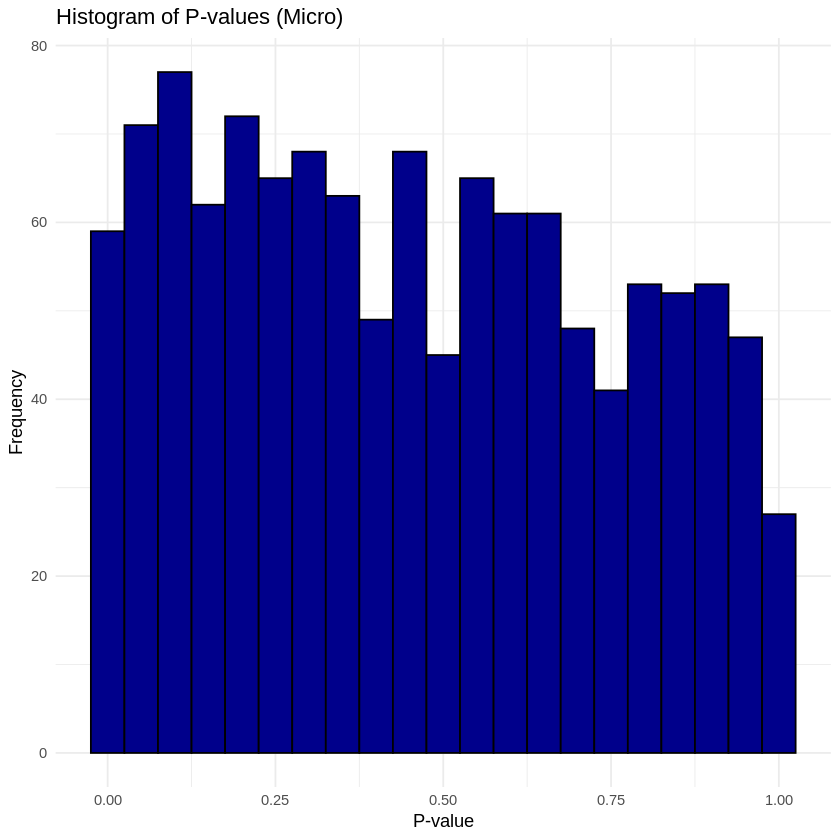

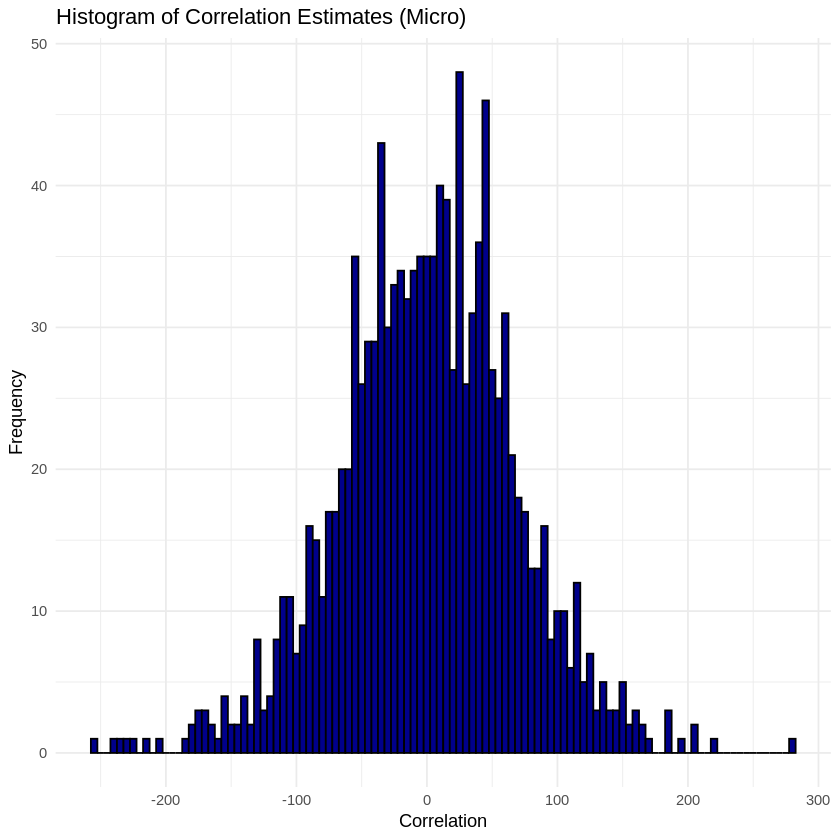

In [27]:
# Cell type - Micro
# Load the results data frame (assuming it was previously saved)
results <- read.csv("output_Micro.csv")

# Plot histogram for p-values
ggplot(results, aes(x = P_value)) +
  geom_histogram(binwidth = 0.05, fill = "darkblue", color = "black") +
  theme_minimal() +
  labs(title = "Histogram of P-values (Micro)", x = "P-value", y = "Frequency")

# Plot histogram for correlation estimates
ggplot(results, aes(x = Correlation)) +
  geom_histogram(binwidth = 5, fill = "darkblue", color = "black") +
  theme_minimal() +
  labs(title = "Histogram of Correlation Estimates (Micro)", x = "Correlation", y = "Frequency")


In [28]:
# Load the necessary library
library(dplyr)

# Load the results data frame (assuming it was previously saved)
results <- read.csv("output_Micro.csv")

# Adjust the p-values using the Benjamini-Hochberg (BH) method for multiple testing correction
results$Adjusted_P_value <- p.adjust(results$P_value, method = "BH")

# Identify significant regions with an adjusted p-value <= 0.1
significant_positive <- results %>% filter(Adjusted_P_value <= 0.1 & Correlation > 0)
significant_negative <- results %>% filter(Adjusted_P_value <= 0.1 & Correlation < 0)

# Count the number of significant regions
num_significant_positive <- nrow(significant_positive)
num_significant_negative <- nrow(significant_negative)

# Print the counts
cat("Number of significantly positively associated regions (Adjusted P <= 0.1):", num_significant_positive, "\n")
cat("Number of significantly negatively associated regions (Adjusted P <= 0.1):", num_significant_negative, "\n")

# Optionally, view the significant regions
print(significant_positive)
print(significant_negative)


Number of significantly positively associated regions (Adjusted P <= 0.1): 1 
Number of significantly negatively associated regions (Adjusted P <= 0.1): 0 
                          Peak      P_value Correlation R_squared
1 hg38.chr12.56152313.56152814 1.321561e-05    219.5727 0.3755046
  Adjusted_Correlation Adjusted_P_value
1                   NA       0.01595124
[1] Peak                 P_value              Correlation         
[4] R_squared            Adjusted_Correlation Adjusted_P_value    
<0 rows> (or 0-length row.names)


In [29]:
# Load necessary libraries
library(dplyr)

# Load the data frame (assuming it is named 'results')
# Replace 'your_data_file.csv' with your actual CSV file if needed
results <- read.csv("output_Micro.csv")

# Ensure that 'P_value' column is numeric for sorting
results$P_value <- as.numeric(results$P_value)

# Find the most positively associated peak (smallest p-value)
most_positive_peak <- results %>%
  filter(!is.na(P_value)) %>%
  arrange(P_value) %>%
  slice(1)

# Find the most negatively associated peak (largest p-value)
most_negative_peak <- results %>%
  filter(!is.na(P_value)) %>%
  arrange(desc(P_value)) %>%
  slice(1)

# Print the most positively and negatively associated peaks
cat("Most Positively Associated Peak:", most_positive_peak$Peak,
    "with P-value:", most_positive_peak$P_value, "\n")

cat("Most Negatively Associated Peak:", most_negative_peak$Peak,
    "with P-value:", most_negative_peak$P_value, "\n")

Most Positively Associated Peak: hg38.chr12.56152313.56152814 with P-value: 1.321561e-05 
Most Negatively Associated Peak: hg38.chr1.28248390.28248891 with P-value: 0.9996969 


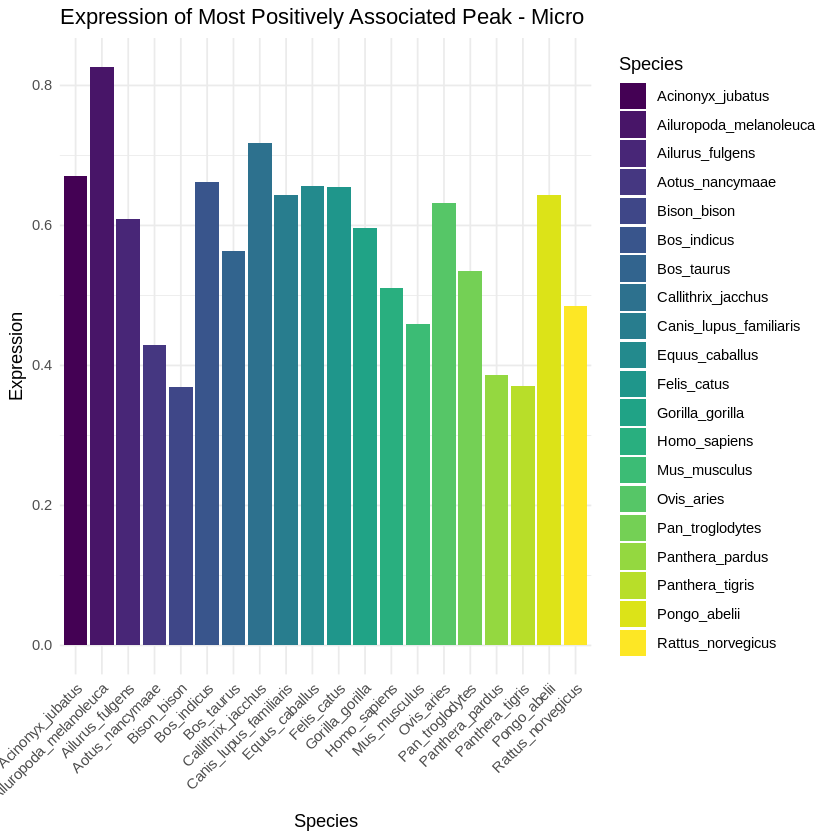

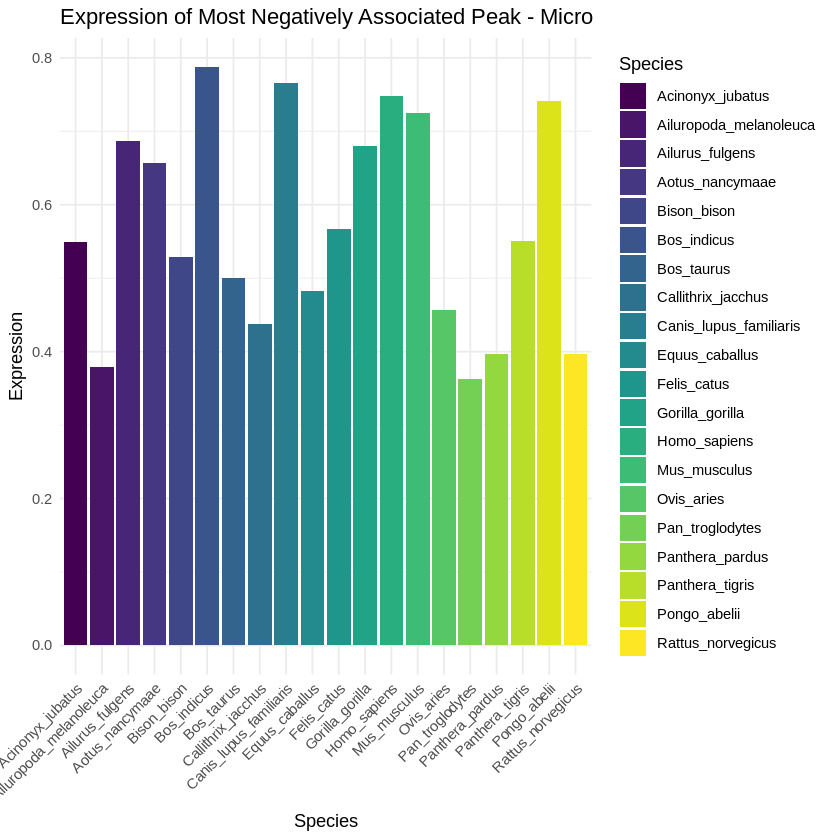

In [31]:
# Generate 20 distinct colors using a custom color palette or viridis
colors_20 <- viridis::viridis(20)

# Load the filtered data
filtered_data <- read.csv("filtered_micro_data.csv")

# Extract the most positively and negatively associated peaks from the results data frame
most_positive_peak <- "hg38.chr12.56152313.56152814"  # Replace with the actual identifier if needed
most_negative_peak <- "hg38.chr1.28248390.28248891"   # Replace with the actual identifier if needed

# Extract relevant data for these peaks
positive_peak_data <- filtered_data %>%
  select(Species, all_of(most_positive_peak))

negative_peak_data <- filtered_data %>%
  select(Species, all_of(most_negative_peak))

# Melt data for plotting
positive_peak_data_long <- positive_peak_data %>%
  pivot_longer(cols = -Species, names_to = "Peak", values_to = "Expression")

negative_peak_data_long <- negative_peak_data %>%
  pivot_longer(cols = -Species, names_to = "Peak", values_to = "Expression")

# Plot for the most positively associated peak with 20 custom colors
ggplot(positive_peak_data_long, aes(x = Species, y = Expression, fill = Species)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = colors_20) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Expression of Most Positively Associated Peak - Micro",
       x = "Species",
       y = "Expression")

# Plot for the most negatively associated peak with 20 custom colors
ggplot(negative_peak_data_long, aes(x = Species, y = Expression, fill = Species)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = colors_20) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Expression of Most Negatively Associated Peak - Micro",
       x = "Species",
       y = "Expression")


In [32]:
# Load the results data frame
results <- read.csv("output_Micro.csv")

# Check if the required columns exist
required_columns <- c("Peak", "P_value")
missing_columns <- setdiff(required_columns, colnames(results))

if (length(missing_columns) > 0) {
  stop(paste("The following required columns are missing from the data frame:", paste(missing_columns, collapse = ", ")))
}

# Step 1: Find the top 200 positively and negatively associated peaks based on p-value
top_200_positive_peaks <- results %>%
  filter(!is.na(P_value)) %>%
  arrange(P_value) %>%
  slice(1:200)

top_200_negative_peaks <- results %>%
  filter(!is.na(P_value)) %>%
  arrange(desc(P_value)) %>%
  slice(1:200)

# Step 2: Correctly split the 'Peak' column into 'chr', 'start', and 'stop'
top_200_positive_peaks <- top_200_positive_peaks %>%
  separate(Peak, into = c("genome", "chr", "start", "stop"), sep = "\\.", remove = FALSE) %>%
  select(chr, start, stop)

top_200_negative_peaks <- top_200_negative_peaks %>%
  separate(Peak, into = c("genome", "chr", "start", "stop"), sep = "\\.", remove = FALSE) %>%
  select(chr, start, stop)

# Remove 'hg38.' prefix from 'chr' column
top_200_positive_peaks <- top_200_positive_peaks %>%
  mutate(chr = sub("hg38\\.", "", chr))

top_200_negative_peaks <- top_200_negative_peaks %>%
  mutate(chr = sub("hg38\\.", "", chr))

# Step 3: Save the results to .bed files
write.table(top_200_positive_peaks,
            "top_200_positive_micro.bed",
            sep = "\t",
            row.names = FALSE,
            col.names = FALSE,
            quote = FALSE)

write.table(top_200_negative_peaks,
            "top_200_negative_micro.bed",
            sep = "\t",
            row.names = FALSE,
            col.names = FALSE,
            quote = FALSE)

cat("Top 200 positively and negatively associated peaks have been saved as .bed files.")


Top 200 positively and negatively associated peaks have been saved as .bed files.

In [33]:
# Load the results data frame
results <- read.csv("output_Micro.csv")

# Check if the required columns exist
if (!"Peak" %in% colnames(results)) {
  stop("The 'Peak' column is missing from the data frame.")
}

# Step 1: Split the 'Peak' column into 'chr', 'start', and 'stop'
results_bed <- results %>%
  separate(Peak, into = c("genome", "chr", "start", "stop"), sep = "\\.", remove = FALSE) %>%
  select(chr, start, stop)

# Remove 'hg38.' prefix from 'chr' column
results_bed <- results_bed %>%
  mutate(chr = sub("hg38\\.", "", chr))

# Step 2: Save the results to a .bed file
write.table(results_bed,
            "all_peaks_micro.bed",
            sep = "\t",
            row.names = FALSE,
            col.names = FALSE,
            quote = FALSE)

cat("All peaks have been saved as a .bed file.")


All peaks have been saved as a .bed file.